In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from datetime import datetime

# Data EDA

In [2]:
df = pd.read_json('reviews.json')

In [3]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,Pattern: LED Flashlight 2P,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,Pattern: LED Flashlight 2P,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
10,Pattern: LED Flashlight 2P,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
100,Pattern: LED Flashlight 2P,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
101,Pattern: 4 pack,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


In [4]:
df.count()

product_pattern    742
review_date        742
review_id          742
review_rating      742
review_text        742
review_title       742
user_id            742
user_name          742
dtype: int64

In [5]:
df.isnull().values.any()

False

In [6]:
df.nunique()

product_pattern      3
review_date        313
review_id          742
review_rating        5
review_text        732
review_title       480
user_id            742
user_name          645
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 99
Data columns (total 8 columns):
product_pattern    742 non-null object
review_date        742 non-null object
review_id          742 non-null object
review_rating      742 non-null int64
review_text        742 non-null object
review_title       742 non-null object
user_id            742 non-null object
user_name          742 non-null object
dtypes: int64(1), object(7)
memory usage: 52.2+ KB


In [8]:
df.product_pattern.unique()

array(['Pattern: LED Flashlight 2P', 'Pattern: 4 pack', 'Pattern: 6 pack'], dtype=object)

- product_pattern

In [9]:
df = df.replace({'Pattern: LED Flashlight 2P':'2 pack',
         'Pattern: 4 pack':'4 pack', 
         'Pattern: 6 pack':'6 pack'})

In [10]:
df.head()

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name
0,2 pack,2017-03-04,R3FS49IG7WSV3T,5,These Rockbirds LED Flashlights I bought came...,Quality made and a fantastic deal! Let me sho...,AH324LU7UFITEQ77IETSUVLSCGEQ,GardenGuy
1,2 pack,2018-02-10,RWJ5AI1HQ4RK9,4,"Given my many prior, poor experiences with sev...","Miniature in size & price, but big on light ou...",AEIL7YNQKHDFB4QHB3MSR262LNYQ,NSB
10,2 pack,2017-04-27,R1SJEDRGD0ZI4P,5,Great deal for a pair of mini flashlights. Ve...,love these mini flashlights,AGE4RTB36XFI6KKPR3G5AZMDDI3A,paintednightsky
100,2 pack,2017-09-25,R15ICB0LYJIK9B,5,"Nice, bright little flashlight for the money. ...",Good value,AFFTSHTP3GGXUMIRWYLD6F4MH6XQ,A. Collins
101,4 pack,2018-02-06,R341U8KZCCF6ZA,5,I loved these Rockbird flashlights. I already ...,Great flashlights for the price.,AHLWCEHGHDXTLTUITWFSN2ZT66SA,Cris0911


- review_date

In [11]:
df[df.review_date < '2017-01-01']

,product_pattern,review_date,review_id,review_rating,review_text,review_title,user_id,user_name


- review_id

In [12]:
len(df.review_id.unique())

742

- review_rating

In [13]:
df.review_rating.unique()

array([5, 4, 1, 3, 2])

In [14]:
rating = pd.DataFrame(df.review_rating.value_counts().head(5))
rating.reset_index(level=0, inplace = True)
rating.columns=['rating', 'count']
rating

,rating,count
0,5,473
1,4,104
2,1,70
3,3,49
4,2,46


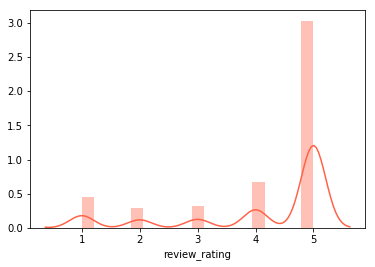

In [15]:
sns.distplot(df.review_rating, color = 'tomato')
plt.show()

- review_text

In [16]:
len(df.review_text.unique())

732

In [17]:
review_text = pd.DataFrame(df.review_text.value_counts().head(10))
review_text = pd.DataFrame(review_text.head(7))
review_text.reset_index(level=0, inplace = True)
review_text.columns = ['text', 'count']

In [18]:
review_text

,text,count
0,Great product,4
1,Very bright and compact,3
2,Very good.,2
3,good,2
4,Perfect,2
5,perfect,2
6,very good,2


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


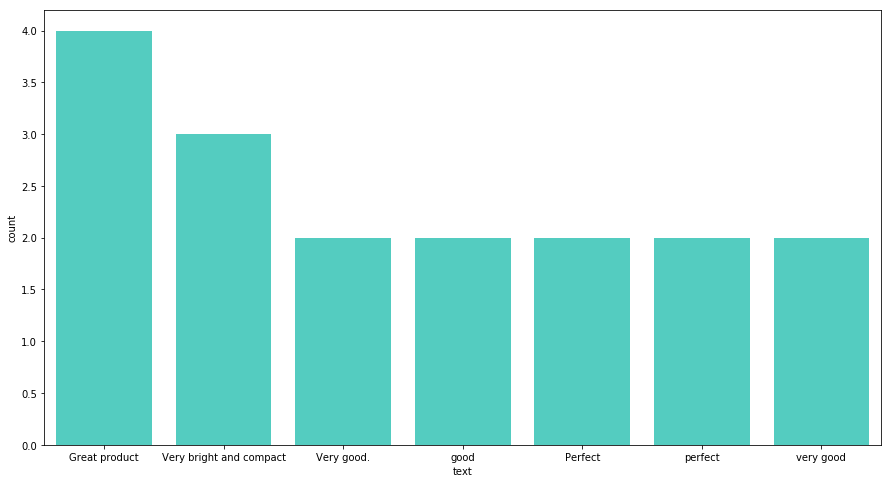

In [19]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="text", y="count", data=review_text,
            label="Reviews Duplicate", color="turquoise",ax = ax)
plt.show()

- review title

In [20]:
review_title = pd.DataFrame(df.review_title.value_counts().head(10))
review_title.reset_index(level=0, inplace = True)
review_title.columns = ['title', 'count']
review_title

,title,count
0,Five Stars,184
1,Four Stars,35
2,One Star,18
3,Three Stars,14
4,Two Stars,6
5,great,2
6,Great little flashlight,2
7,Rockbirds LED Flashlight,2
8,Bright,2
9,Solid,2


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


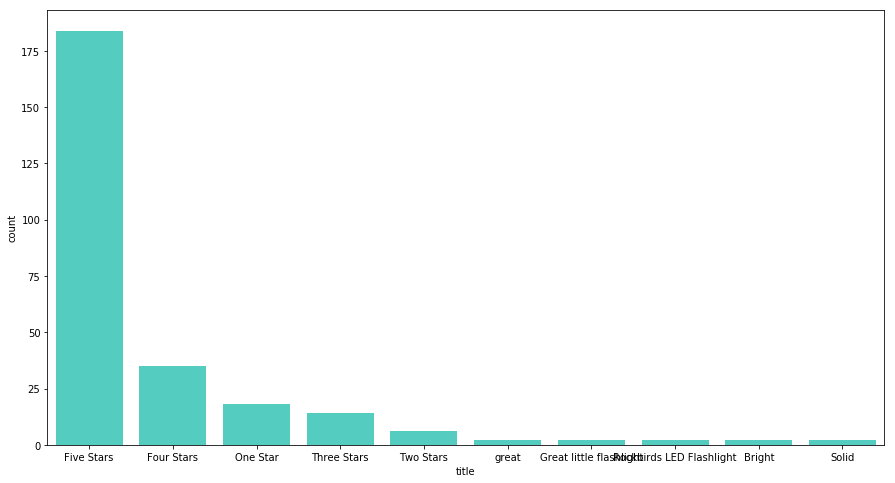

In [21]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="title", y="count", data=review_title,
            label="Title Duplicates", color="turquoise",ax = ax)
plt.show()

- User id

In [22]:
len(df.user_id.unique())

742

- User name

In [23]:
len(df.user_name.unique())

645

In [24]:
user_name = pd.DataFrame(df.user_name.value_counts().head(10))
user_name.reset_index(level=0, inplace = True)
user_name.columns = ['name', 'count']
user_name

,name,count
0,Amazon Customer,80
1,Eric,4
2,Chris,4
3,Cliente de Amazon,3
4,Mike,3
5,Happy,2
6,B,2
7,Robert,2
8,Matthew,2
9,Aaron,2


/Users/mani/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


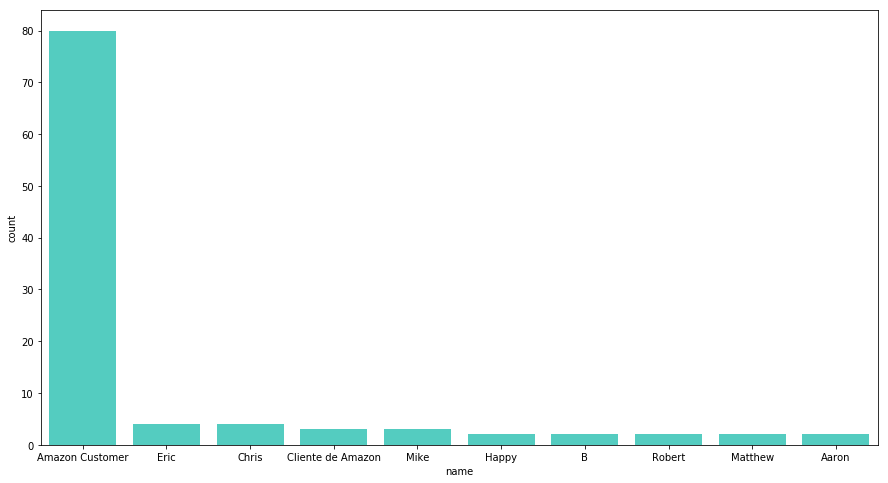

In [25]:
f, ax = plt.subplots(figsize=(15, 8))

sns.barplot(x="name", y="count", data=user_name,
            label="Title Duplicates", color="turquoise",ax = ax)
plt.show()

- product_pattern/rating

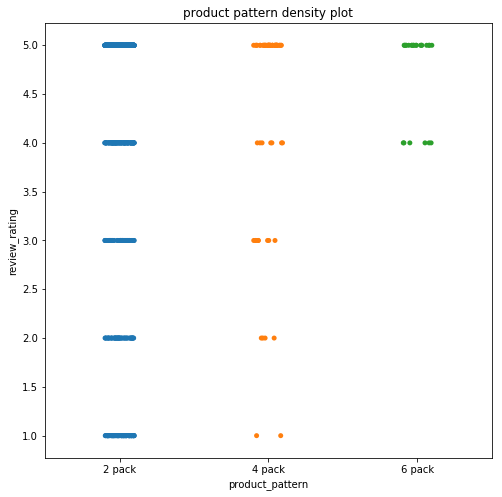

In [26]:
plt.figure(figsize = (8, 8))
plt.title('product pattern density plot')
sns.stripplot(x=df.product_pattern, y=df.review_rating, data=df, jitter=True)
plt.show()

- time/rating

In [27]:
time_rating = pd.DataFrame({'time':df.review_date, 'rating':df.review_rating})

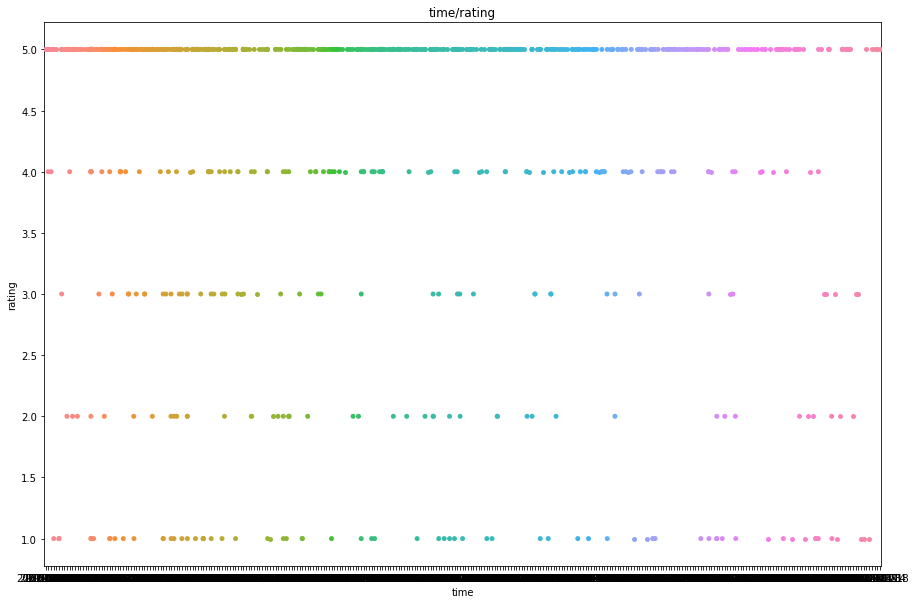

In [28]:
f, ax = plt.subplots(figsize=(15, 10))
plt.title('time/rating')
sns.stripplot(x='time', y='rating', data=time_rating, jitter=True, ax=ax)
plt.show()

### EDA Summary
There are 8 columns in the dataset and 742 observations in total.
- product_pattern: the product format 2 pack, 4 pack and 6 pack
- review_date: after 2017-01-01
- review_id: each review only have 1 id
- review rating: 5 - (473 counts), 4 - (104 counts), 1 - (70 counts), 3 - (49 counts), 2 - (48 counts) 
- review text: Simply check that the duplicates only occurred in short reviews
- review title: 257 customers used stars number to represent the title of the review
- user_id: there are not duplicates
- user_name: 80 customers use 'Amazon Customer' as their user name

product pattern/rating  
time/rating

# Objectives - Machine Learning Algorithms
- Extract customer's evaluation of different topics about the product from review text
        - topics customer cared about (NLP)
        - convert their text evaluation into numerical data(weighted, sentiment analysis)
- Predict their rating based on the weighted evaluation (try:random forest, hierarchical clustering, svm)
- Test the predicted rating and observed rating

### step1: customer's evaluation of different topics about the product from review text
#### 1.1: which topics customer cared about?